# E2.1 - Redução de dimensionalidade (até 2018-05-24 às 23:50)
## Alunos: Leonardo Wajnsztok e Samuel Bastos

1) Com o dataset de vinhos, faça uma redução de dimensionalidade para plotar os dados em 2D. Utilize cores distintas para as diversas classes de vinho. Faça isso utilizando PCA e MDS. Discuta as diferenças entre os dois resultados.

2) Utilizando o seaborn, faça um grid cujas colunas são os níveis de qualidade dos vinhos e as linhas são os diversos atributos (do dataset original, e não do redimensionado).

In [1]:
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
import pandas as pd
import numpy as np
import random

seed = 1032
random.seed(seed)

In [2]:
dataset_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
initial_df = pd.read_csv(dataset_url, sep=";")
initial_df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


In [3]:
label_column = 'quality'
feature_columns = set(initial_df.columns)
feature_columns.remove(label_column)
feature_columns = list(feature_columns)
labels = initial_df.quality.unique()

print (label_column, feature_columns)
print (labels)

quality ['sulphates', 'pH', 'fixed acidity', 'citric acid', 'residual sugar', 'alcohol', 'volatile acidity', 'chlorides', 'density', 'total sulfur dioxide', 'free sulfur dioxide']
[5 6 7 4 8 3]


# 1)

## PCA

In [4]:
from sklearn.decomposition import PCA

In [5]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(initial_df[feature_columns])
pca_data[:3]

array([[-13.22490501,  -2.02389981],
       [ 22.03772361,   4.40832155],
       [  7.16267333,  -2.50146086]])

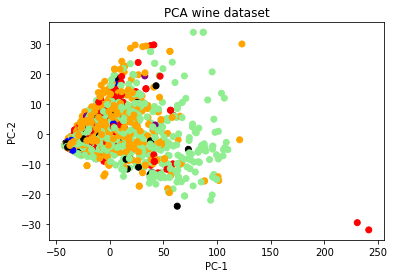

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('PCA wine dataset')
ax.set_xlabel('PC-1')
ax.set_ylabel('PC-2')
cmap = sns.cubehelix_palette(as_cmap=True, n_colors=len(labels), start=6)
cmap = sns.palettes.blend_palette(colors=['blue', 'black', 'lightGreen', 'orange', 'red', 'purple'], as_cmap=True)

ax.scatter(x=pca_data[:, 0], y=pca_data[:, 1], c=initial_df.quality, cmap=cmap)

plt.show()

## MDS

In [7]:
import scipy.spatial.distance
from sklearn.manifold import MDS
from scipy.spatial.distance import pdist, squareform

In [11]:
D = pdist(initial_df[feature_columns], metric='euclidean')
D = squareform(D)
D[:3]

array([[ 0.        , 35.86019221, 20.40970496, ..., 19.07949696,
        23.32259701, 10.9912459 ],
       [35.86019221,  0.        , 16.40458887, ..., 27.36763755,
        24.13167951, 26.08185696],
       [20.40970496, 16.40458887,  0.        , ..., 19.89463389,
        19.82371349, 12.64021468]])

In [12]:
mds = MDS(n_components=2, dissimilarity='precomputed')
fit_t = mds.fit_transform(D)

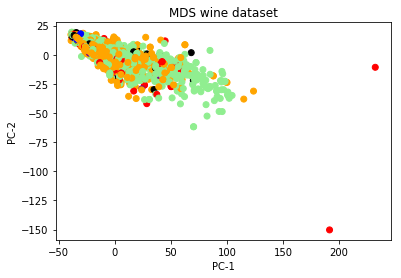

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('MDS wine dataset')
ax.set_xlabel('PC-1')
ax.set_ylabel('PC-2')
cmap = sns.cubehelix_palette(as_cmap=True, n_colors=len(labels), start=6)
cmap = sns.palettes.blend_palette(colors=['blue', 'black', 'lightGreen', 'orange', 'red', 'purple'], as_cmap=True)

ax.scatter(x=fit_t[:, 0], y=fit_t[:, 1], c=initial_df.quality, cmap=cmap)

plt.show()

# 2)

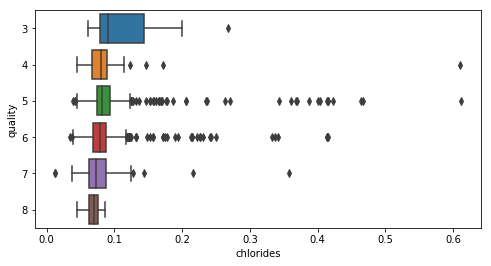

In [30]:
f, ax = plt.subplots(figsize=(8, 4))
sns.boxplot(y="quality", x="chlorides", data=initial_df, orient='h')
# ax.xaxis.grid(True)
# sns.despine(trim=True, left=True)

ValueError: x and y must be the same size

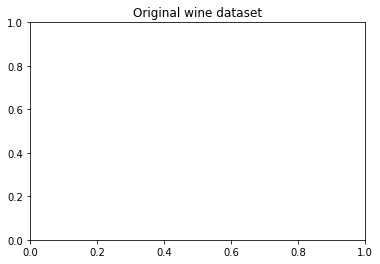

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('Original wine dataset')
cmap = sns.cubehelix_palette(as_cmap=True, n_colors=len(labels), start=6)
cmap = sns.palettes.blend_palette(colors=['blue', 'black', 'lightGreen', 'orange', 'red', 'purple'], as_cmap=True)

ax.scatter(x=initial_df[feature_columns], y=initial_df.quality, c=initial_df.quality, cmap=cmap)

plt.show()